In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [6]:
food = pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv',encoding_errors = 'ignore')
food

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04


In [11]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [23]:
food.groupby(['Item'])[['Y2014']].sum()

,Y2014
Item,
"Alcohol, Non-Food",2403.00
Alcoholic Beverages,102410.11
Animal Products,11935.65
Animal fats,209460.54
Apples and products,9499.23
...,...
"Vegetables, Other",155038.96
Vegetal Products,107145.19
Wheat and products,232670.13


In [25]:
food.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [30]:
food.isna().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

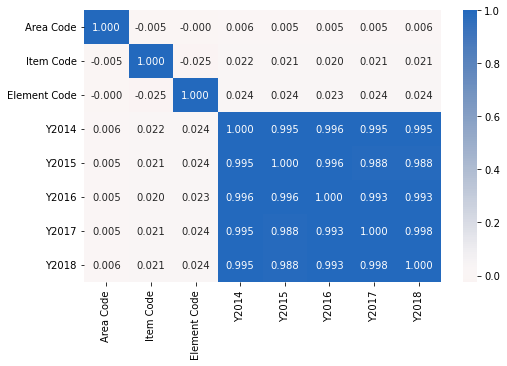

In [32]:
plt.figure(figsize = [8, 5])
sb.heatmap(food[food.columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [68]:
food[food.Area=='Algeria'].groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,464,311204,614916,83755.94,85972.86,87157.61,86810.42,90023.42
Export Quantity,392,264011,579278,1328.64,1104.62,1340.22,1494.54,811.54
Fat supply quantity (g/capita/day),432,291489,73872,320.19,317.40,309.54,320.74,309.09
Feed,88,58967,121462,9656.04,10308.00,9903.00,9571.00,10668.00
Food,420,282744,539910,60582.69,61693.49,63081.43,62785.33,63736.33
Food supply (kcal/capita/day),432,291489,71712,13500.00,13512.00,13483.00,13363.00,13288.00
Food supply quantity (kg/capita/yr),420,282744,67725,1556.45,1552.81,1555.77,1516.94,1509.28
Import Quantity,448,301030,628432,34940.12,37841.91,36736.08,36059.29,36238.29
Losses,208,139857,266396,7231.00,7471.00,7405.00,7428.00,7708.00


In [67]:
food.nunique()

Area Code         49
Area              49
Item Code        122
Item             119
Element Code      18
Element           18
Unit               5
Y2014           4493
Y2015           4520
Y2016           4520
Y2017           4537
Y2018           4591
dtype: int64

In [85]:
food.groupby('Element').sum()[['Y2018']].sort_values(by='Y2018')

,Y2018
Element,
Tourist consumption,90.00
Fat supply quantity (g/capita/day),10258.69
Protein supply quantity (g/capita/day),11833.56
Stock Variation,20577.91
Seed,25263.14
Residuals,34864.00
Food supply quantity (kg/capita/yr),49056.85
Other uses (non-food),91300.97
Losses,163902.00
